Formativa IA - 07/10/24

Preparação dos Dados

In [2]:
import numpy as np #importa a biblioteca numpy
from sklearn.model_selection import train_test_split #importa biblioteca de testes
from sklearn.tree import DecisionTreeClassifier #importa a arvore de decisão
from sklearn import tree #importa a função tree para plotar a arvore
from sklearn.metrics import accuracy_score #métrica de ácuracia do algoritimo
from sklearn.metrics import confusion_matrix # importa matiz de confusão
import pandas as pd #importa a biblioteca pandas
import matplotlib.pyplot as plt # importa a matplotlib
import seaborn as sns # importa a seaborn

In [9]:
#importação da base de dados csv
df = pd.read_csv('dados_produtos.csv')

In [10]:
df.head() #exibe os 4 primiros dados do csv

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [22]:

print(df.info()) # exibe as Informações do DataFrame
print(df.describe()) # exibe as informações estatísticas descritivas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB
None
           rating  rating_count  purchased
count  100.000000    100.000000     100.00
mean     4.056900   2536.670000       0.55
std      0.588344   1458.312544       0.50
min      3.020000     10.000000       0.00
25%      3.580000   1433.250000       0.00
50%      4.105000   2424.000000       1.00
75%      4.505000   3773.000000       1.00
max      5.000000   4977.000000       1.00


Exploração dos dados


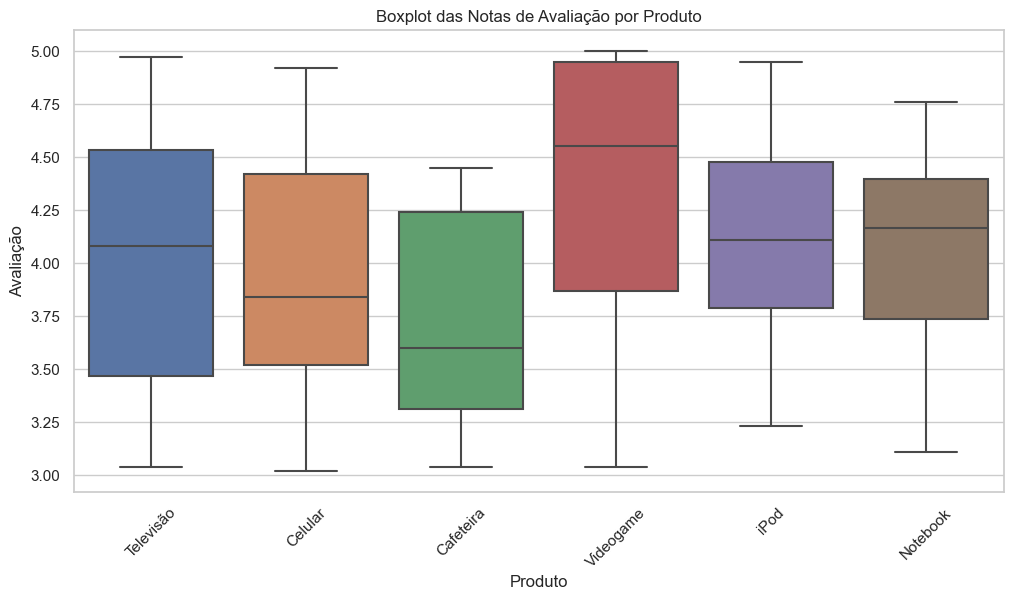

In [82]:
# Criação do Boxplot para visualizar a distribuição das notas de avaliação por produto
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_name', y='rating', data=df)
plt.title('Boxplot das Notas de Avaliação por Produto')  # Título do gráfico
plt.xlabel('Produto')  # Rótulo do eixo x
plt.ylabel('Avaliação')  # Rótulo do eixo y
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()  # Exibe o gráfico




Pré-processamento dos dados

In [41]:
# Verificar valores ausentes
print(df.isnull().sum()) # Exibe a contagem de valores nulos por coluna
# Preencher valores ausentes na coluna 'rating' com a média
df['rating'].fillna(df['rating'].mean(), inplace=True)

# Codificar variáveis categóricas (converter texto em números)
df['product_name'] = df['product_name'].astype('category').cat.codes

product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64


Divisão do conjunto de dados em treinamento e teste

In [85]:
# Divisão do conjunto de dados em treinamento e teste
X = df[['rating', 'rating_count']]  # Características
y = df['purchased']  # Rótulo (se o produto foi comprado ou não)

# Divisão em conjuntos de treinamento e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Criação do modelo da Arvore de Decisão

In [55]:
# Criação do modelo para as arvores de decições
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [87]:
# Criação do modelo da Árvore de Decisão
models = {}  # Dicionário para armazenar modelos para cada produto
for product in df['product_name'].unique():
    product_data = df[df['product_name'] == product]  # Filtra dados para o produto atual
    X_product = product_data[['rating', 'rating_count']]  # Características do produto
    y_product = product_data['purchased']  # Rótulo do produto
    
    # Divisão em conjuntos de treinamento e teste para o produto
    X_train_product, X_test_product, y_train_product, y_test_product = train_test_split(X_product, y_product, test_size=0.2, random_state=42)

    
    models[product] = model  # Armazena o modelo no dicionário

Avaliação do Modelo Usando o Conjunto de Dados

In [83]:
# Avaliação do Modelo Usando o Conjunto de Dados
for product, model in models.items():
    y_pred = model.predict(X_test_product)  # Faz previsões com o modelo
    print(f'Métricas para o Produto {product}:')
    print(classification_report(y_test_product, y_pred))  # Exibe relatório de métricas
    print(confusion_matrix(y_test_product, y_pred))  # Exibe matriz de confusão

Métricas para o Produto Televisão:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

[[2 1]
 [0 1]]
Métricas para o Produto Celular:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.00      0.00      0.00         1

    accuracy                           0.25         4
   macro avg       0.25      0.17      0.20         4
weighted avg       0.38      0.25      0.30         4

[[1 2]
 [1 0]]
Métricas para o Produto Cafeteira:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75      

Vizualização da Arvore de Decisão

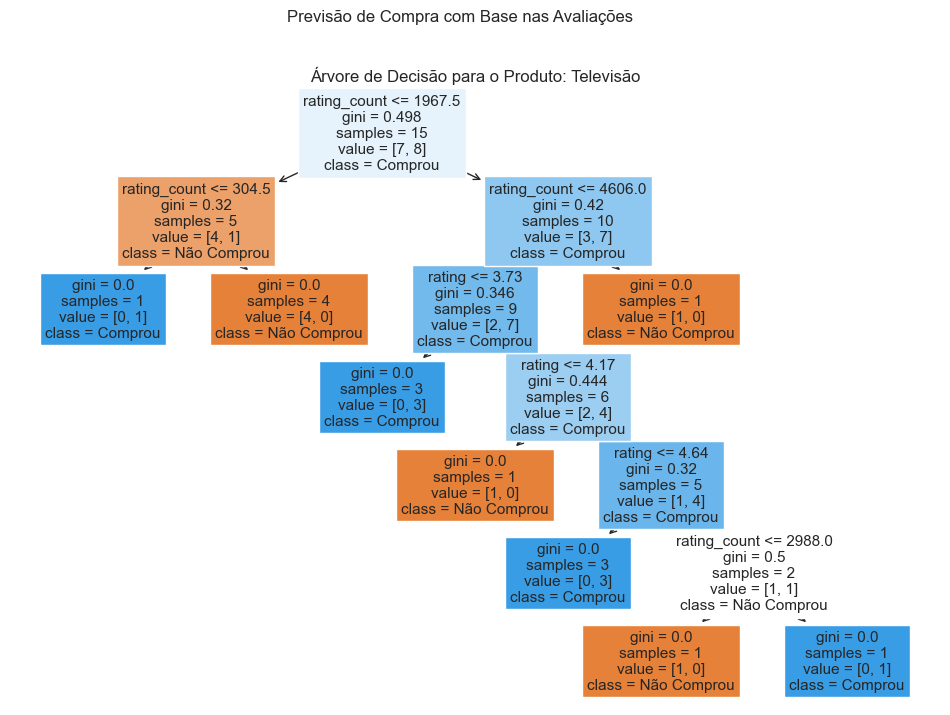

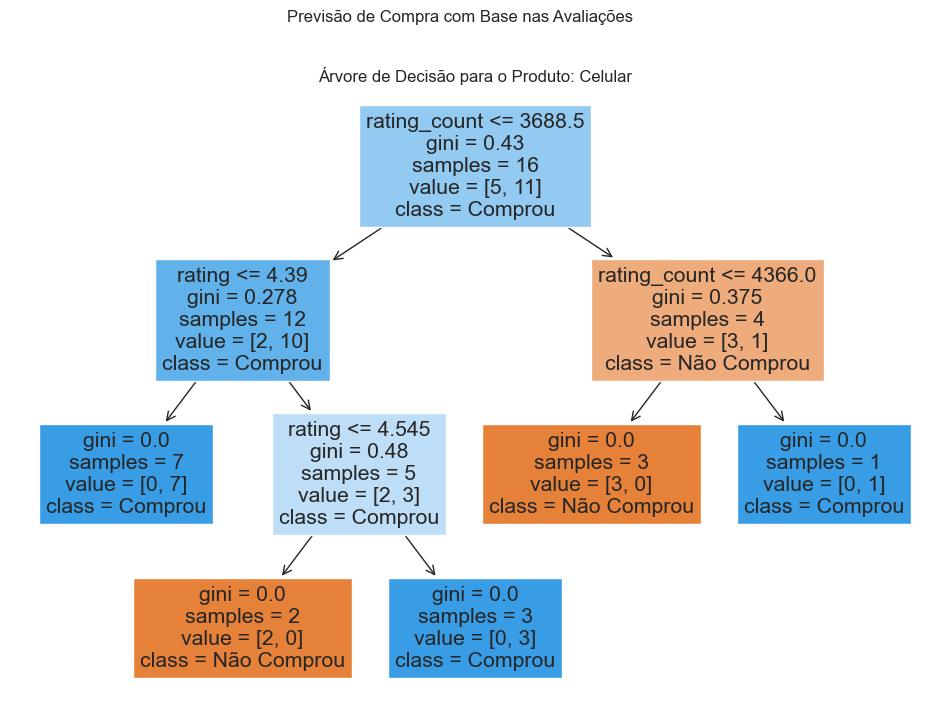

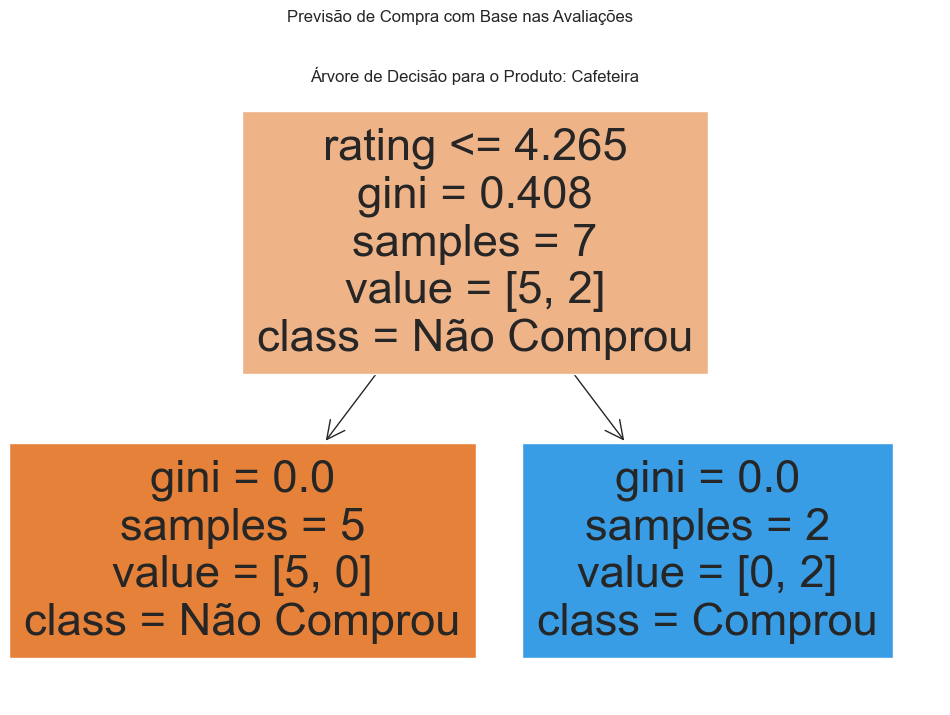

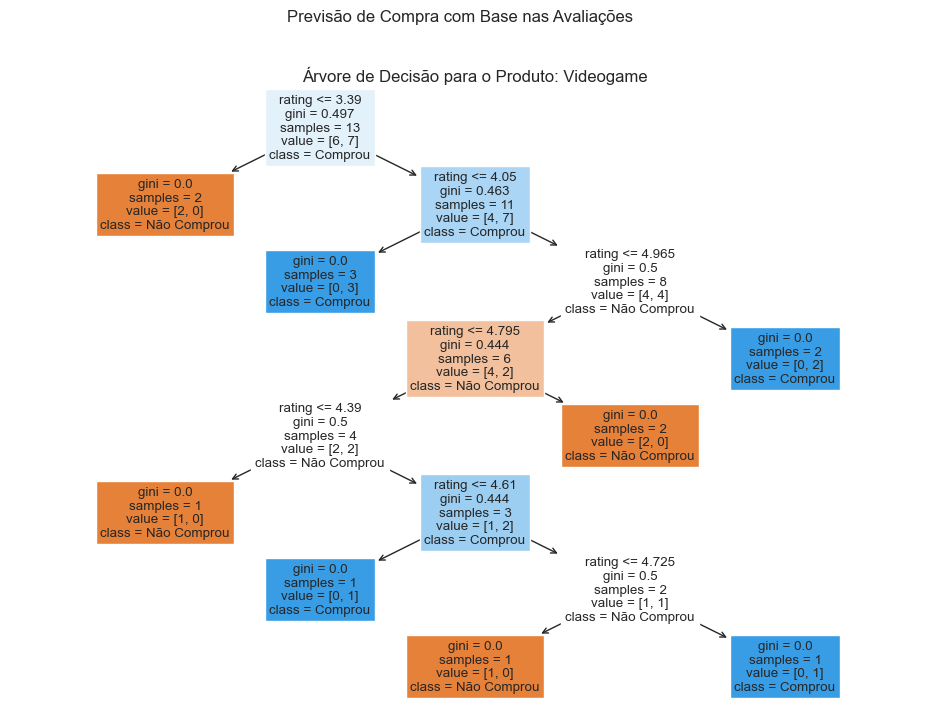

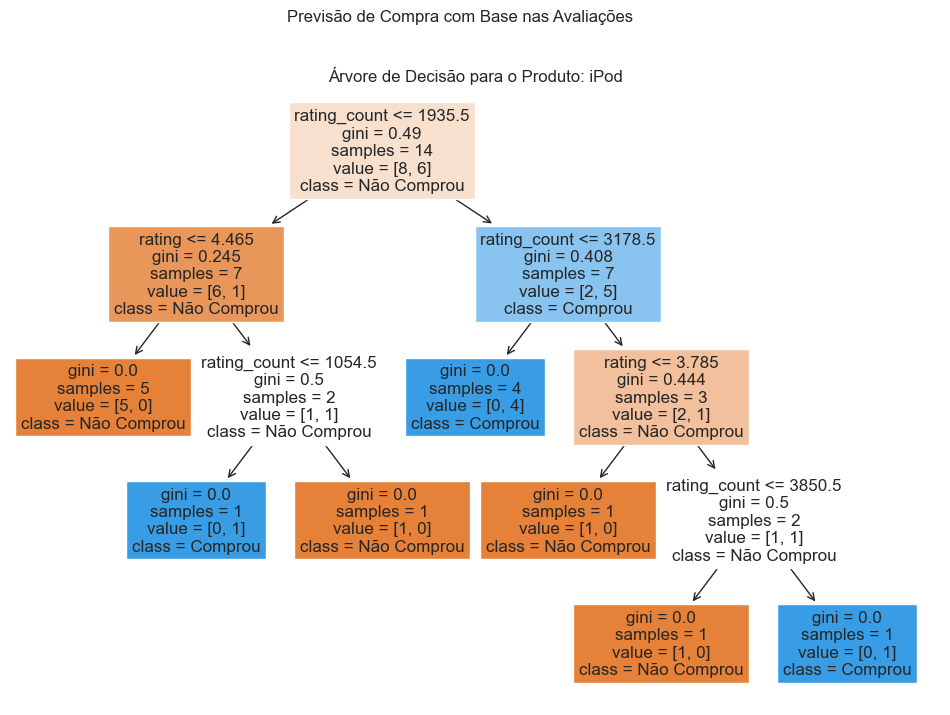

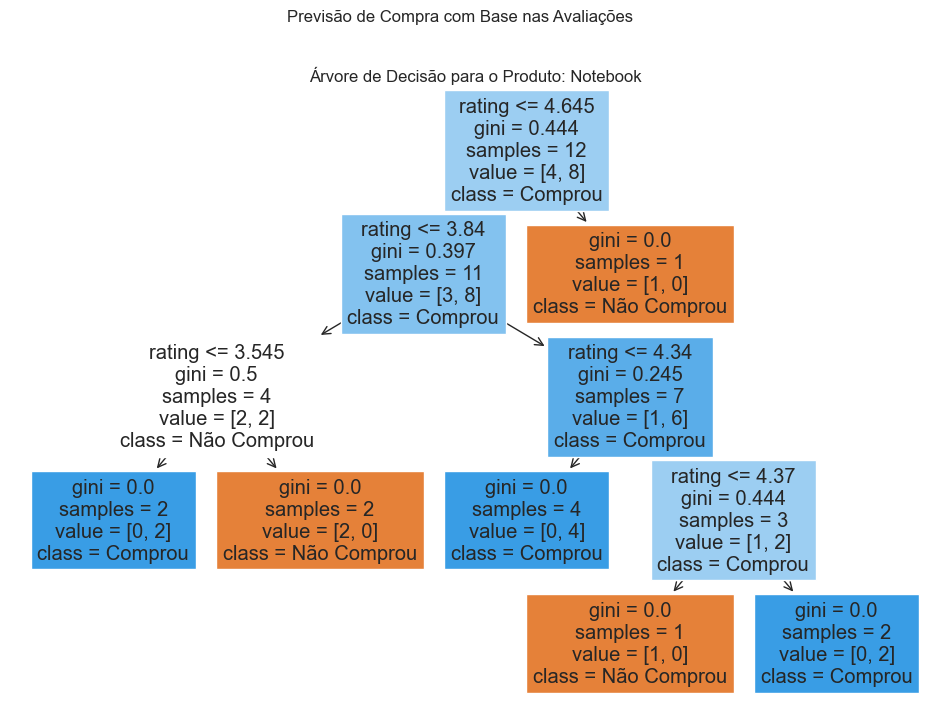

In [84]:
# Visualização da Árvore de Decisão
from sklearn.tree import plot_tree  # Importa a função para plotar a árvore

# Visualizar a árvore de decisão para cada produto
for product, model in models.items():
    plt.figure(figsize=(12, 8))  # Define o tamanho da figura
    plot_tree(model, feature_names=['rating', 'rating_count'], class_names=['Não Comprou', 'Comprou'], filled=True)  # Plota a árvore
    plt.title(f'Árvore de Decisão para o Produto: {product}')  # Título do gráfico com o nome do produto
    plt.suptitle('Previsão de Compra com Base nas Avaliações', fontsize=12)  # Subtítulo
    plt.show()  # Exibe o gráfico

